<h1 style="background-color:white;font-family:rockwell;font-size:290%;text-align:center">Resume Categorizing</h1>

*********************************************************

![](resume4.jpg)

### Contents
* [**Abstract**](#abstract)
* [**Dataset**](#dataset)
* [**Importing Dataset and the required libraries**](#import)
* [**Information about the dataset**](#info)
* [**Part A :: Exploratory Data Analysis**](#eda)
    * [Distinct Values of the dataset](#distinct)
    * [Graphical representation of job categories](#graph)
    * [Category-wise Distribution](#pie)
    * [Data Cleaning](#clean)
    * [Label Encoder](#label-encoder)
* [**Part B :: Classification Algorithms**](#part-b)
    * [K-Nearest Neighbour Algorithm](#knn)
    * [Decision Tree Classifier](#dtc)
    * [Random Forest Classifier](#rfc)
    * [Gausian NB Algorithm](#gnb)
    * [Logistic Regression](#log)
    * [Support Vector Machine](#svm)
    * [AdaBoost Algorithm](#ada)
    * [Artificial Neural Network](#ann)

* [**Conclusion**](#conclusion)

<a id = 'abstract'></a>
### Abstract

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

Here I am going to use several machine learning algorithms for the categorization procedure of the resumes, and finally the models are going to be checked based on the accuracy score.

<a id = 'dataset'></a>
### Dataset
The dataset which is used in this project, is collected from Kaggle. Here is the link of the dataset : https://www.kaggle.com/gauravduttakiit/resume-dataset

<a id = 'import'></a>
### Importing the Dataset and the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


<a id = 'info'></a>
### Information about the dataset

In [3]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


<a id="eda"></a>
## Part A :: Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

<a id = 'distinct'></a>
### Distinct values of the dataset

In [4]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [5]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Sales                        40
Data Science                 40
Mechanical Engineer          40
Operations Manager           40
ETL Developer                40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


**Most number of categories present in the dataset are -**
1. Java Developer
2. Testing
3. DevOps Engineer
4. Python Developer
5. Web Designing

These are all bright sides of the engineering as well as job oriented background!

<a id = 'graph'></a>
### Graphical Representation of the Job Categories

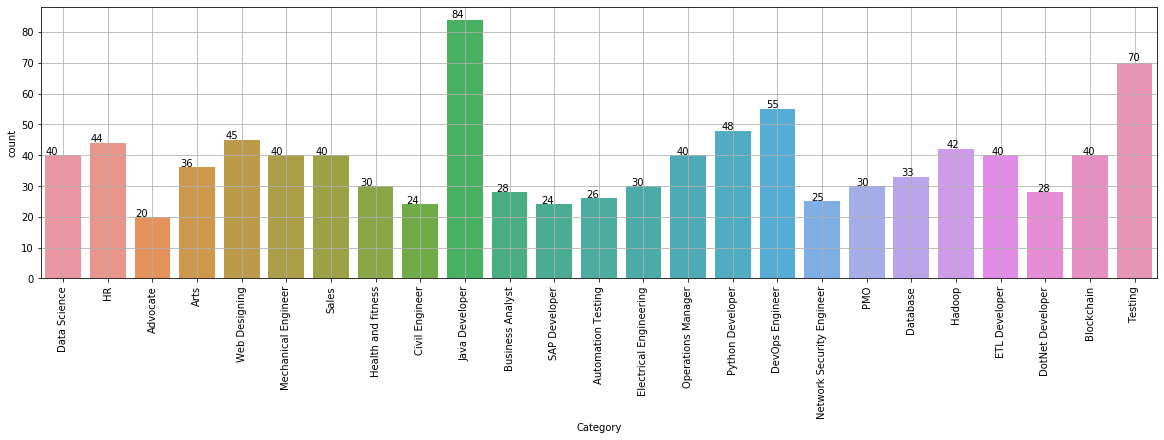

In [6]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

<a id = 'pie'></a>
### Category-wise Distribution

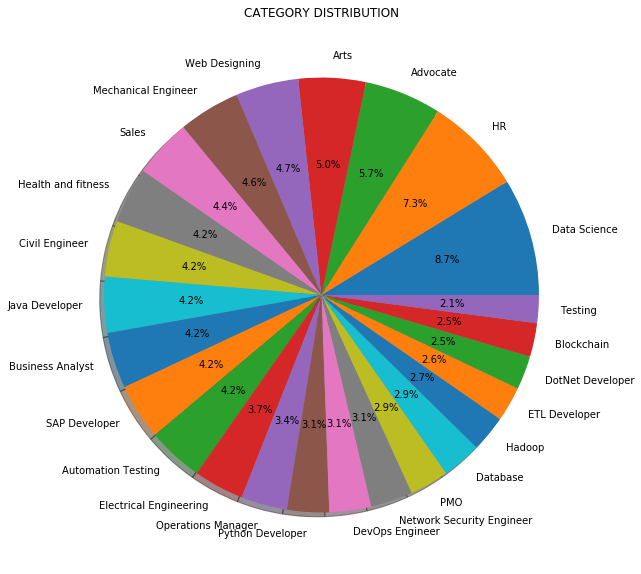

In [7]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

**The pie chart shows the category-wise distribution -**
1. Data Science is always having the upper hand
2. Then comes the Human Resources
3. Surprisingly after HR, Advocate comes into play!
4. Then more surprisingly, Arts background joins the party!!

<a id = 'clean'></a>
### Data Cleaning
Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [8]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [9]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [10]:
resumeDataSet_d=resumeDataSet.copy()

<a id = 'label-encoder'></a>
### Introducing the Label Encoder in the dataset

Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [11]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [12]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [13]:
resumeDataSet.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
18    40
16    40
10    40
3     40
22    40
6     40
1     36
7     33
19    30
14    30
11    30
4     28
9     28
2     26
17    25
5     24
21    24
0     20
Name: Category, dtype: int64

In [14]:
resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Sales                        40
Data Science                 40
Mechanical Engineer          40
Operations Manager           40
ETL Developer                40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

**Most number of categories present in the dataset are -**
1. Java Developer
2. Testing
3. DevOps Engineer
4. Python Developer
5. Web Designing

These are all bright sides of the engineering as well as job oriented background!

***********************************

<a id="part-b"></a>
## Part B :: Classification Algorithms
A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.

Here we are going to prepare several Classification machine learning models based on those we will do a comparative analysis that which model is better among them.

We are using eight different classification algorithms -
* **K-Nearest Neighbours Algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


* **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.


* **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.


* **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


* **Naive Bayes Classifcation Algorithm** :  Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.


* **Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


* **AdaBoosting Algorithm** : AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.


* **Artificial Neural Network** : Artificial neural networks, usually simply called neural networks, are computing systems vaguely inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

Let's quickly get into the algorithms!

<a id="train-test-split"></a>
**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * X_train and y_train are the trainning datasets
  * X_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


<a id = 'knn'></a>
### K-Nearest Neighbour Algorithm
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [17]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))



Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [18]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

In [19]:
from sklearn.pipeline import Pipeline

<a id = 'gnb'></a>
### Gausian Naive Bayes Classifier Algorithm
Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.

In [24]:
from sklearn.naive_bayes import GaussianNB
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train.todense(), y_train)
prediction = clf.predict(X_test.todense())
print('Accuracy of Naive Bayes classifiers on training set: {:.2f}'.format(clf.score(X_train.todense(), y_train)))
print('Accuracy of Naive Bayes classifiers on test set:     {:.2f}'.format(clf.score(X_test.todense(), y_test)))

Accuracy of Naive Bayes classifiers on training set: 1.00
Accuracy of Naive Bayes classifiers on test set:     0.99


<a id = 'dtc'></a>
### Decision Tree Classifier
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = OneVsRestClassifier(DecisionTreeClassifier())
clf.fit(X_train.todense(), y_train)
prediction = clf.predict(X_test.todense())
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf.score(X_train.todense(), y_train)))
print('Accuracy of Decision Tree Classifier on test set:     {:.2f}'.format(clf.score(X_test.todense(), y_test)))

Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set:     0.99


<a id = 'rfc'></a>
### Random Forest Classifier
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(X_train.todense(), y_train)
prediction = clf.predict(X_test.todense())
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(clf.score(X_train.todense(), y_train)))
print('Accuracy of Random Forest Classifier on test set:     {:.2f}'.format(clf.score(X_test.todense(), y_test)))

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set:     0.99


<a id = 'log'></a>
### Logistic Regression
 Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [26]:
from sklearn.linear_model import LogisticRegression
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train.todense(), y_train)
prediction = clf.predict(X_test.todense())
print('Accuracy of Logistic regression on training set: {:.2f}'.format(clf.score(X_train.todense(), y_train)))
print('Accuracy of Logistic regression on test set:     {:.2f}'.format(clf.score(X_test.todense(), y_test)))

Accuracy of Logistic regression on training set: 1.00
Accuracy of Logistic regression on test set:     0.99


<a id = "svm"></a>
### SVM Classification
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [34]:
from sklearn.svm import SVC
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of Support Vector Machine on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Support Vector Machine on test set:     {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of Support Vector Machine on training set: 1.00
Accuracy of Support Vector Machine on test set:     0.99


In [16]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

<a id = 'ada'></a>
### AdaBoost Algorithm
AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.

In [17]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [18]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [20]:
prediction = clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of AdaBoost Classifier on training set: 0.24
Accuracy of AdaBoost Classifier on test set:     0.23


<a id = 'ann'></a>
### Artificial Neural Networks Algorithm
Artificial neural networks, usually simply called neural networks, are computing systems vaguely inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

In [21]:
clf = MLPClassifier(alpha=1, max_iter=1000)

In [22]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [23]:
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     0.99


************************

<a id = 'conclusion'></a>
## Conclusion and Comparison
We have deployed eight machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Test Accuracy Score|
|:---:|:---:|
|Logistic Regression|0.99|
|Decision Tree Classifier|0.99|
|Random Forest Classifier|0.99|
|Naive Bayes Algorithm|0.99|
|KNN Algorithm|0.98|
|Support Vector Machine Algorithm|0.99|
|AdaBoosting Classifier|0.23|
|Artificial Neural Network|0.99|

**Comparing all those scores scored by the machine learning algorithms, it is clear that Logistic Regression, Decision tree Classifier, Random Forest Classifier, Naive Bayes Algorithm, Support Vector Machine, Artificial Neural Network Algorithm are having the upper hand in case of this dataset and after this, we can use K-Nearest Neighbours algorithm which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Logistic Regression
2. Decision tree Classifier
3. Random Forest Classifier
4. Naive Bayes Algorithm
5. Support Vector Machine
6. Artificial Neural Network
7. K-Nearest Neighbours
8. AdaBoosting Classifier


Hooray!! The models are deployed successfully!


### Hope this project will help you! Thank you!